# Stock Crawling

SEOYEON CHOI  
2023-07-07

# Import

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime
from matplotlib import dates as mdates
from bs4 import BeautifulSoup as bs

# Korea(KOSPI)

In [20]:
url = 'https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=1'

In [21]:
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36'}
response = requests.get(url, headers=headers)

In [22]:
response.text

In [23]:
html = bs(response.text, 'html.parser')
html_table = html.select("table")
table = pd.read_html(str(html_table))
print('파싱된 테이블의 개수 :', len(table))

파싱된 테이블의 개수 : 2

In [24]:
table[0]

In [25]:
table[1]

In [26]:
table[0].dropna()

In [40]:
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI'  
for page in range(1, 500):
    page_url = '{}&page={}'.format(sise_url, page)
    print(page_url)

    # 위에서 했던 일련의 과정들을 각 url에 대해서 (99페이지에 대해서 반복)
    response = requests.get(page_url, headers=headers)
    html = bs(response.text, 'html.parser')
    html_table = html.select("table")
    table = pd.read_html(str(html_table))

    # 현재 얻은 데이터프레임을 기존 데이터프레임에 누적.
    df = df.append(table[0].dropna())

https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=1
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=2
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=3
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=4
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=5
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=6
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=7
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=8
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=9
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=10
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=11
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=12
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=13
https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI&page=14
https://finance

  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[0].dropna())
<ipython-input-40-3bcb01c44ed2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

In [41]:
df

In [42]:
df = df.dropna()
# df = df.iloc[0:30] 
df = df.sort_values(by='날짜')
df

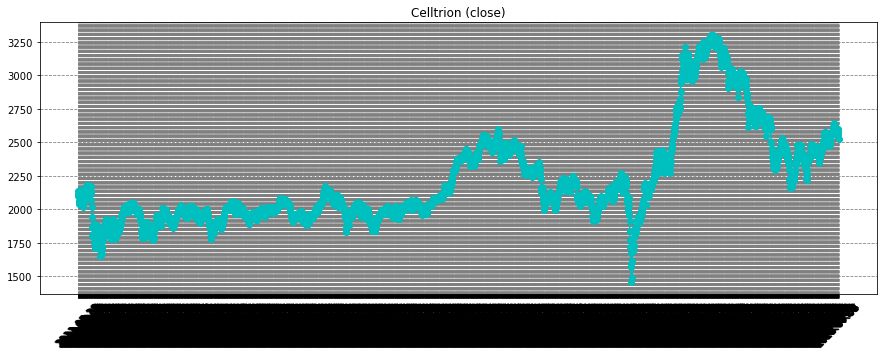

In [43]:
plt.figure(figsize=(15, 5)) 
plt.title('Celltrion (close)')
plt.xticks(rotation=45) 
plt.plot(df['날짜'], df['체결가'], 'co-')
plt.grid(color='gray', linestyle='--')
plt.show()

In [44]:
df.to_csv('korea_kospi.csv')

# US(NASDAQ)

In [49]:
url = 'https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=1'

In [50]:
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36'}
response = requests.get(url, headers=headers)

In [51]:
response.text

In [52]:
html = bs(response.text, 'html.parser')
html_table = html.select("table")
table = pd.read_html(str(html_table))
print('파싱된 테이블의 개수 :', len(table))

파싱된 테이블의 개수 : 3

In [53]:
table[0]

In [54]:
table[1]

In [55]:
table[2]

In [56]:
table[1].dropna()

In [61]:
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#'  
for page in range(1, 500):
    page_url = '{}&page={}'.format(sise_url, page)
    print(page_url)

    # 위에서 했던 일련의 과정들을 각 url에 대해서 (99페이지에 대해서 반복)
    response = requests.get(page_url, headers=headers)
    html = bs(response.text, 'html.parser')
    html_table = html.select("table")
    table = pd.read_html(str(html_table))

    # 현재 얻은 데이터프레임을 기존 데이터프레임에 누적.
    df = df.append(table[1].dropna())

https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=1
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=2
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=3
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=4
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=5
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=6
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=7
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=8
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=9
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=10
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=11
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=12
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=13
https://finance.naver.com/world/sise.naver?symbol=NAS@IXIC#&page=14
https://finance.naver.com/world/sise.naver?symbol=NAS@IXI

  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table[1].dropna())
<ipython-input-61-77dee5e93da6>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

In [67]:
df

In [65]:
df = df.dropna()
# df = df.iloc[0:30] 
df = df.sort_values(by='일자')
df

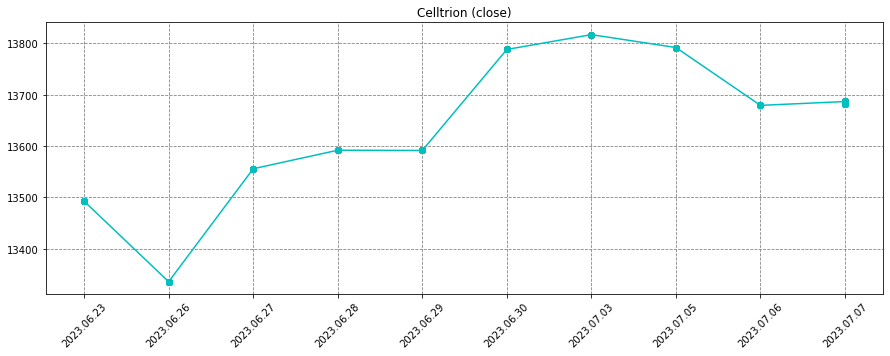

In [66]:
plt.figure(figsize=(15, 5)) 
plt.title('Celltrion (close)')
plt.xticks(rotation=45) 
plt.plot(df['일자'], df['종가'], 'co-')
plt.grid(color='gray', linestyle='--')
plt.show()